In [1]:
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(ggcorrplot)))
library('ggpubr')

Warning message:
"package 'ggpubr' was built under R version 4.2.1"


In [2]:
lead <- c('rs333947','rs596359','rs10787516','rs11023332','rs2657888','rs601339','rs222852','rs2061155','rs1515108',
'rs1108842','rs17366568','rs13131633','rs6450176','rs998584','rs2980879','rs10886863','rs11045172','rs10778506','rs7978610','rs2925979','rs12051272','rs731839')

In [3]:
Metasoft_results <-  read.table("../../ANALYSIS/META/METASOFT/SECOND_PASS/TRANSANCESTRY_METASOFT_SECONDPASS_RESULTS.TAB",fill=TRUE,row.names=NULL,header=FALSE)
META_THREE <- read.table("../data/TRANSANCESTRY_GWAS_ALLELECORRECTED.TAB",header=T,fill=TRUE,row.names=NULL)
colnames(Metasoft_results) <- c("MARKERNAME","N","PVALUE_FE","BETA_FE","STD_FE","PVALUE_RE","BETA_RE","STD_RE","PVALUE_RE2","STAT1_RE2","STAT2_RE2","PVALUE_BE","I_SQUARE","Q","PVALUE_Q","TAU_SQUARE",
                                "PVALUE_ADIPOGEN","PVALUE_AGEN","PVALUE_METSIM","NA1","NA2","NA3")
Metasoft_results <- Metasoft_results%>%filter(MARKERNAME!="RSID")
TRANSANCESTRY_RESULTS <- merge(META_THREE,Metasoft_results,by="MARKERNAME")
TRANSANCESTRY_RESULTS <- TRANSANCESTRY_RESULTS%>%mutate(TOTAL_N=ceiling(ADIPO_N)+ceiling(AGEN_N)+ceiling(METSIM_N))%>%mutate(MAF_AVG=(ADIPO_EAF*2*ADIPO_N+AGEN_EAF*2*AGEN_N+METSIM_EAF*2*METSIM_N)/(2*TOTAL_N))%>%
filter(ADIPO_EAF>0.005)%>%filter(AGEN_EAF>0.005)%>%filter(METSIM_EAF>0.005)%>%select(-NA1,-N,-NA2,-NA3)

In [4]:
TRANSANCESTRY_RESULTS%>%filter(MARKERNAME=="rs222857")%>%select(PVALUE_FE)

PVALUE_FE
<dbl>
5.19842e-09


In [5]:
head(TRANSANCESTRY_RESULTS,2)

,MARKERNAME,CHROMOSOME,POSITION,ADIPO_EA,ADIPO_NEA,ADIPO_EAF,ADIPO_N,ADIPO_BETA,ADIPO_SE,ADIPO_PVALUE,⋯,PVALUE_BE,I_SQUARE,Q,PVALUE_Q,TAU_SQUARE,PVALUE_ADIPOGEN,PVALUE_AGEN,PVALUE_METSIM,TOTAL_N,MAF_AVG
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs10000081,4,17348363,T,C,0.2458,29318,-0.011588,0.005128,0.0284451,⋯,NA,0,0.893958,0.639557,0,0.0238367,0.989502,0.963630,46381,0.3322903
2,rs10000092,4,21895517,T,C,0.3417,29340,0.010649,0.004844,0.0330610,⋯,NA,0,0.693762,0.706889,0,0.0279213,0.275736,0.169606,44685,0.3880619


In [81]:
df1 <- TRANSANCESTRY_RESULTS%>%filter(MARKERNAME %in% lead)%>%select(ADIPO_EAF,AGEN_EAF,METSIM_EAF)%>%rename(ADIPOGen=ADIPO_EAF,AGEN=AGEN_EAF,METSIM=METSIM_EAF)
corr <- round(cor(df1,method="spearman"), 2)
p.mat <- cor_pmat(df1)

In [97]:
p1 <- ggcorrplot(corr, hc.order = TRUE, type = "lower",
   lab = TRUE)+ theme_classic() + theme(axis.text = element_text(size=12),legend.position = "none", axis.title.x = element_blank(),axis.title.y = element_blank())+ylab("")+ggtitle(" Lead Variants AF")

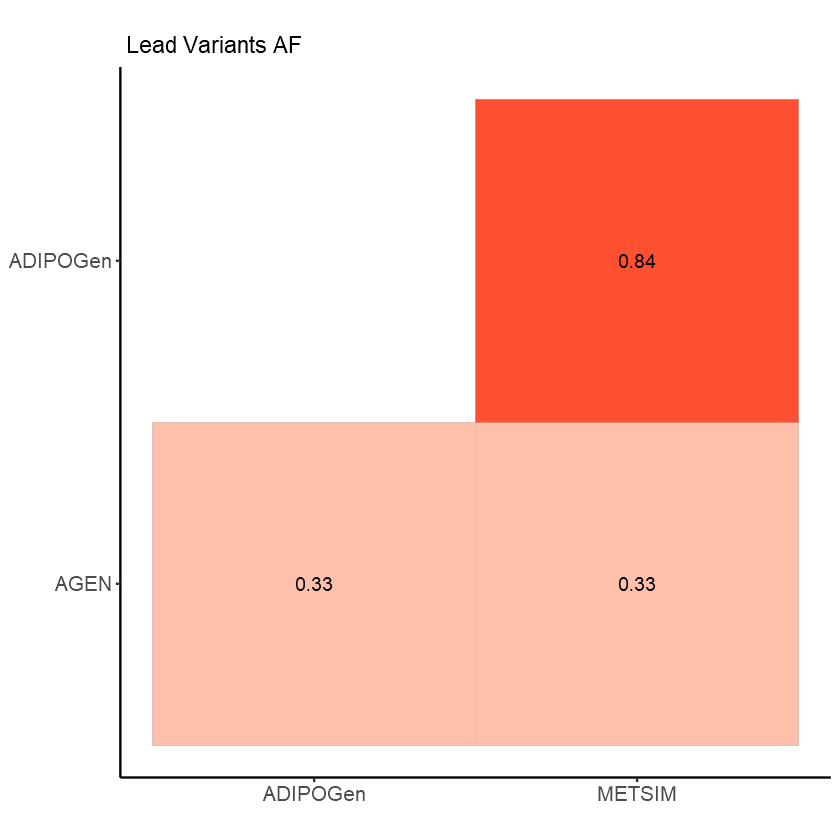

In [98]:
p1

In [105]:
df2 <- TRANSANCESTRY_RESULTS%>%filter(PVALUE_FE < 5e-08)%>%select(ADIPO_EAF,AGEN_EAF,METSIM_EAF)%>%rename(ADIPOGen=ADIPO_EAF,AGEN=AGEN_EAF,METSIM=METSIM_EAF)
corr <- round(cor(df2,method="spearman"), 2)
p.mat <- cor_pmat(df2)

In [106]:
p2 <- ggcorrplot(corr, hc.order = TRUE, type = "lower",
   lab = TRUE)+ theme_classic() + theme(axis.text = element_text(size=12),legend.position = "none", axis.title.x = element_blank(),axis.title.y = element_blank())+ylab("")+ggtitle(" Genome-wide Sig AF")

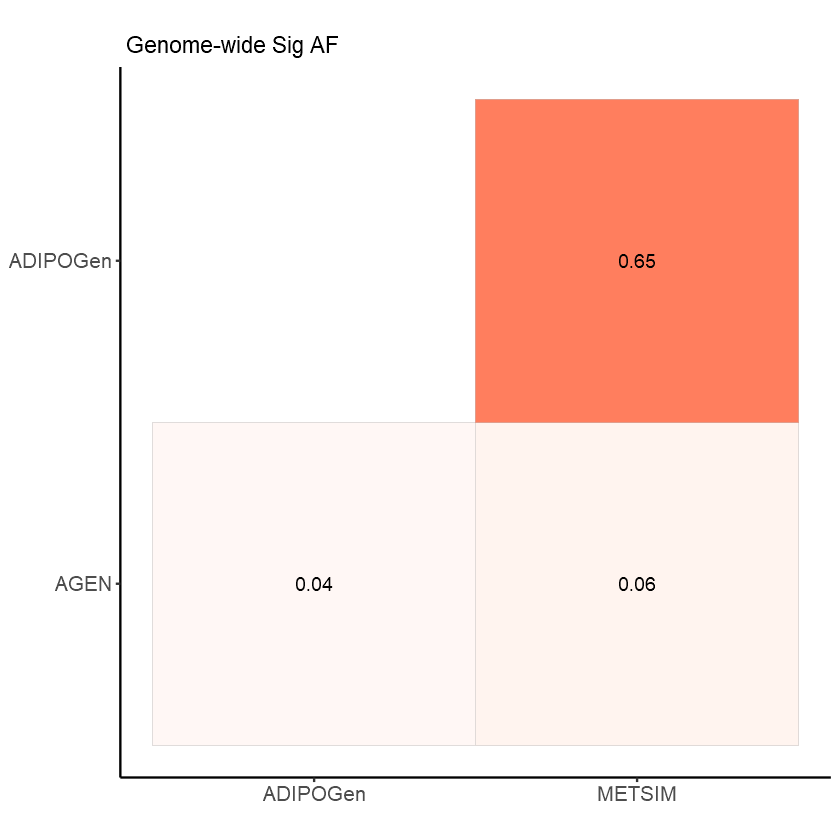

In [107]:
p2

In [108]:
df3 <- TRANSANCESTRY_RESULTS%>%filter(PVALUE_FE < 1E-05)%>%select(ADIPO_EAF,AGEN_EAF,METSIM_EAF)%>%rename(ADIPOGen=ADIPO_EAF,AGEN=AGEN_EAF,METSIM=METSIM_EAF)
corr <- round(cor(df3,method="spearman"), 2)
p.mat <- cor_pmat(df3)

In [109]:
p3 <- ggcorrplot(corr, hc.order = TRUE, type = "lower",
   lab = TRUE)+ theme_classic() + theme(axis.text = element_text(size=12),legend.position = "none", axis.title.x = element_blank(),axis.title.y = element_blank())+ylab("")+ggtitle(" Suggestive Sig AF")

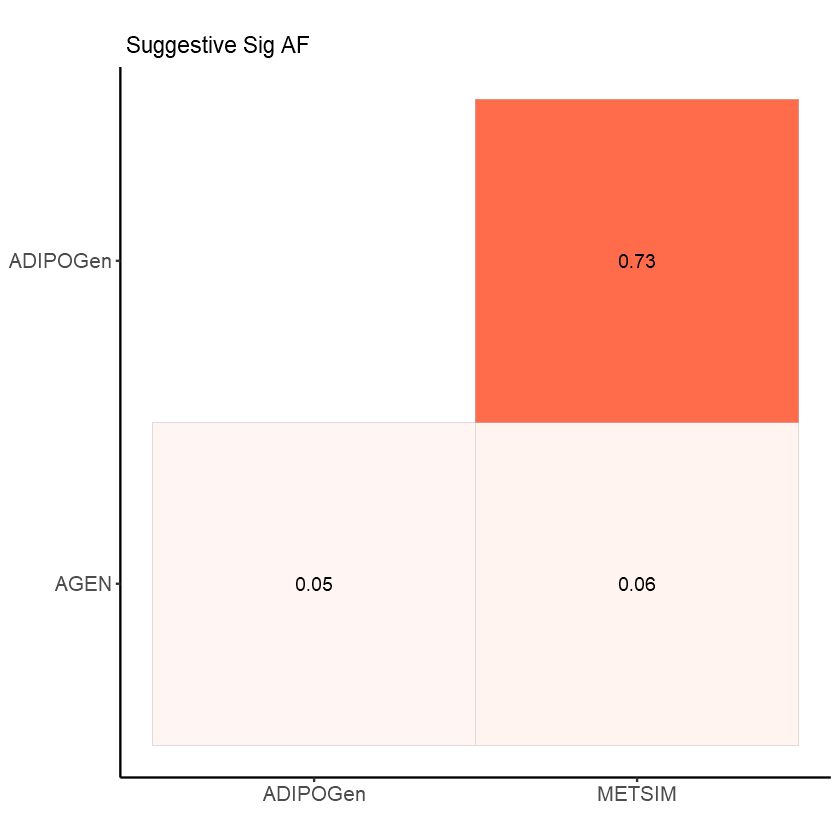

In [110]:
p3

In [111]:
df4 <- TRANSANCESTRY_RESULTS%>%filter(MARKERNAME %in% lead)%>%select(ADIPO_BETA,AGEN_BETA,METSIM_BETA)%>%rename(ADIPOGen=ADIPO_BETA,AGEN=AGEN_BETA,METSIM=METSIM_BETA)
corr <- round(cor(df4,method="spearman"), 2)
p.mat <- cor_pmat(df4)

In [112]:
p4 <- ggcorrplot(corr, hc.order = TRUE, type = "lower",
   lab = TRUE)+ theme_classic() + theme(axis.text = element_text(size=12),legend.position = "none", axis.title.x = element_blank(),axis.title.y = element_blank())+ylab("")+ggtitle(" Lead Variants Effects")

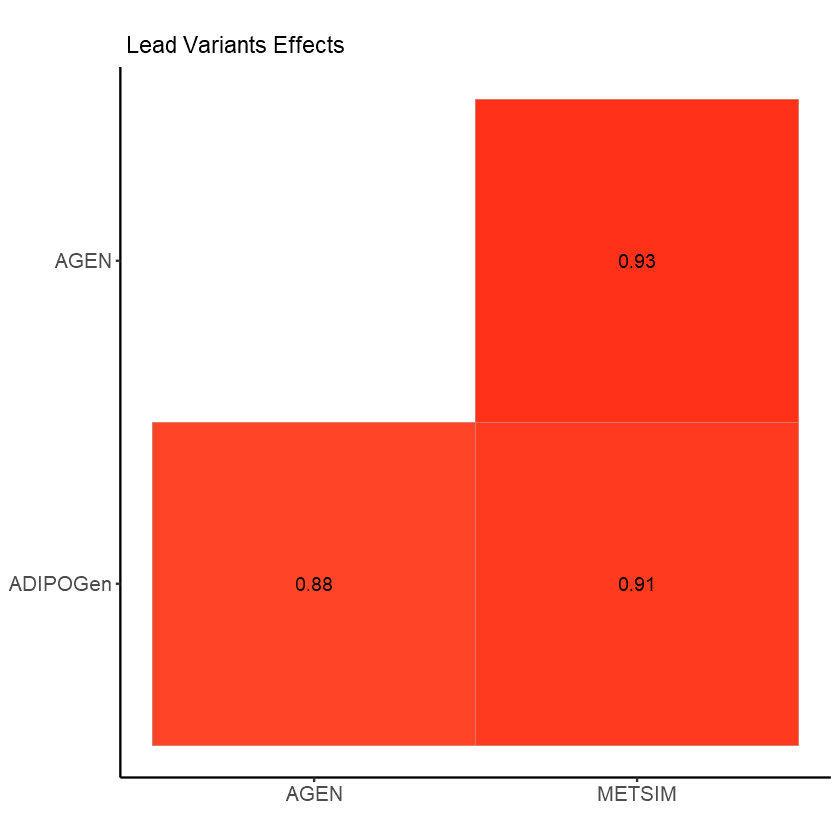

In [113]:
p4

In [114]:
df5 <- TRANSANCESTRY_RESULTS%>%filter(PVALUE_FE < 5e-08)%>%select(ADIPO_BETA,AGEN_BETA,METSIM_BETA)%>%rename(ADIPOGen=ADIPO_BETA,AGEN=AGEN_BETA,METSIM=METSIM_BETA)
corr <- round(cor(df5,method="spearman"), 2)
p.mat <- cor_pmat(df5)

In [115]:
p5 <- ggcorrplot(corr, hc.order = TRUE, type = "lower",
   lab = TRUE)+ theme_classic() + theme(axis.text = element_text(size=12),legend.position = "none", axis.title.x = element_blank(),axis.title.y = element_blank())+ylab("")+ggtitle(" Genome-wide Sig Effects")

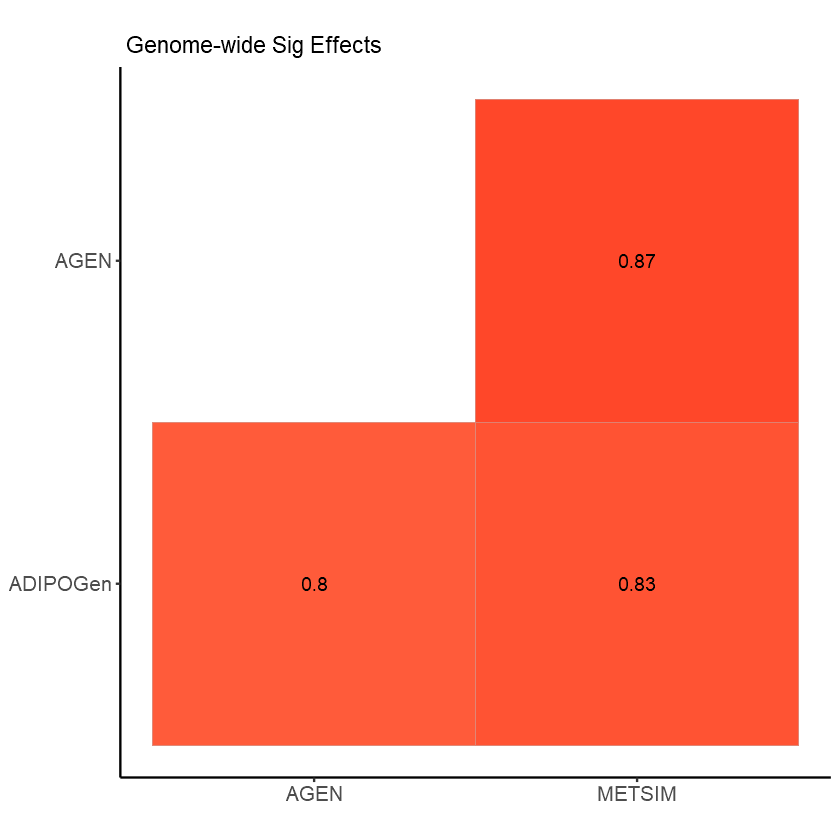

In [116]:
p5

In [123]:
df6 <- TRANSANCESTRY_RESULTS%>%filter(PVALUE_FE < 1e-05)%>%select(ADIPO_BETA,AGEN_BETA,METSIM_BETA)%>%rename(ADIPOGen=ADIPO_BETA,AGEN=AGEN_BETA,METSIM=METSIM_BETA)
corr <- round(cor(df6,method="spearman"), 2)
p.mat <- cor_pmat(df6)

In [126]:
p6 <- ggcorrplot(corr, hc.order = TRUE, type = "lower",
   lab = TRUE)+ theme_classic() + theme(axis.text = element_text(size=12), axis.title.x = element_blank(),axis.title.y = element_blank())+ylab("")+ggtitle("Suggestive Sig Effects")
legend <- get_legend(p6)
p7 <- p6 +theme(legend.position="none")

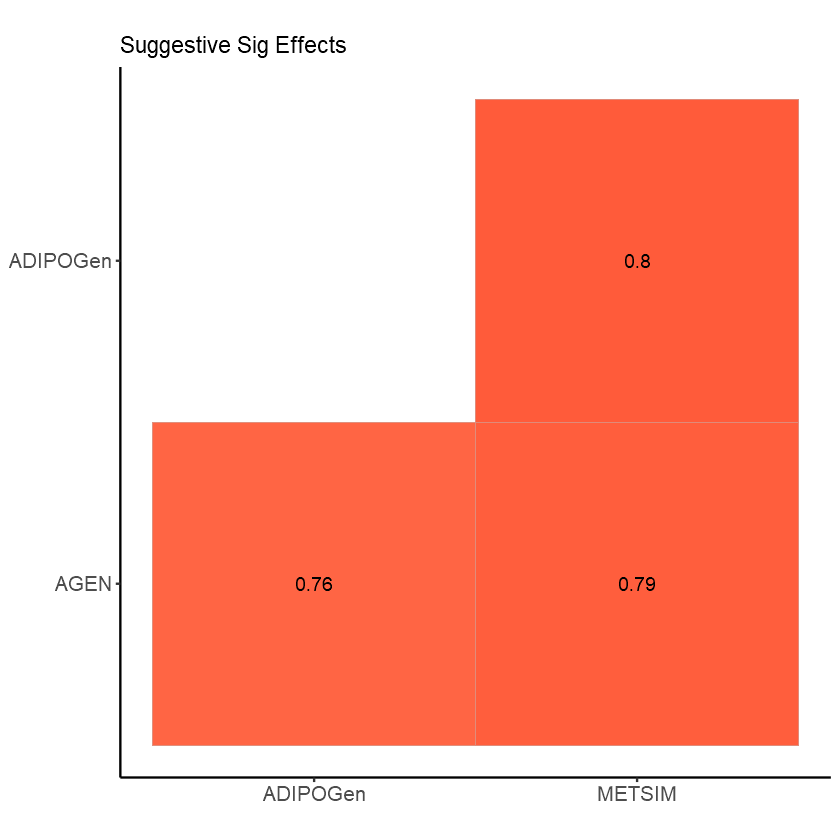

In [125]:
p6

TableGrob (3 x 3) "arrange": 7 grobs
  z     cells    name              grob
1 1 (1-1,1-1) arrange    gtable[layout]
2 2 (1-1,2-2) arrange    gtable[layout]
3 3 (1-1,3-3) arrange    gtable[layout]
4 4 (2-2,1-1) arrange    gtable[layout]
5 5 (2-2,2-2) arrange    gtable[layout]
6 6 (2-2,3-3) arrange    gtable[layout]
7 7 (3-3,1-1) arrange gtable[guide-box]

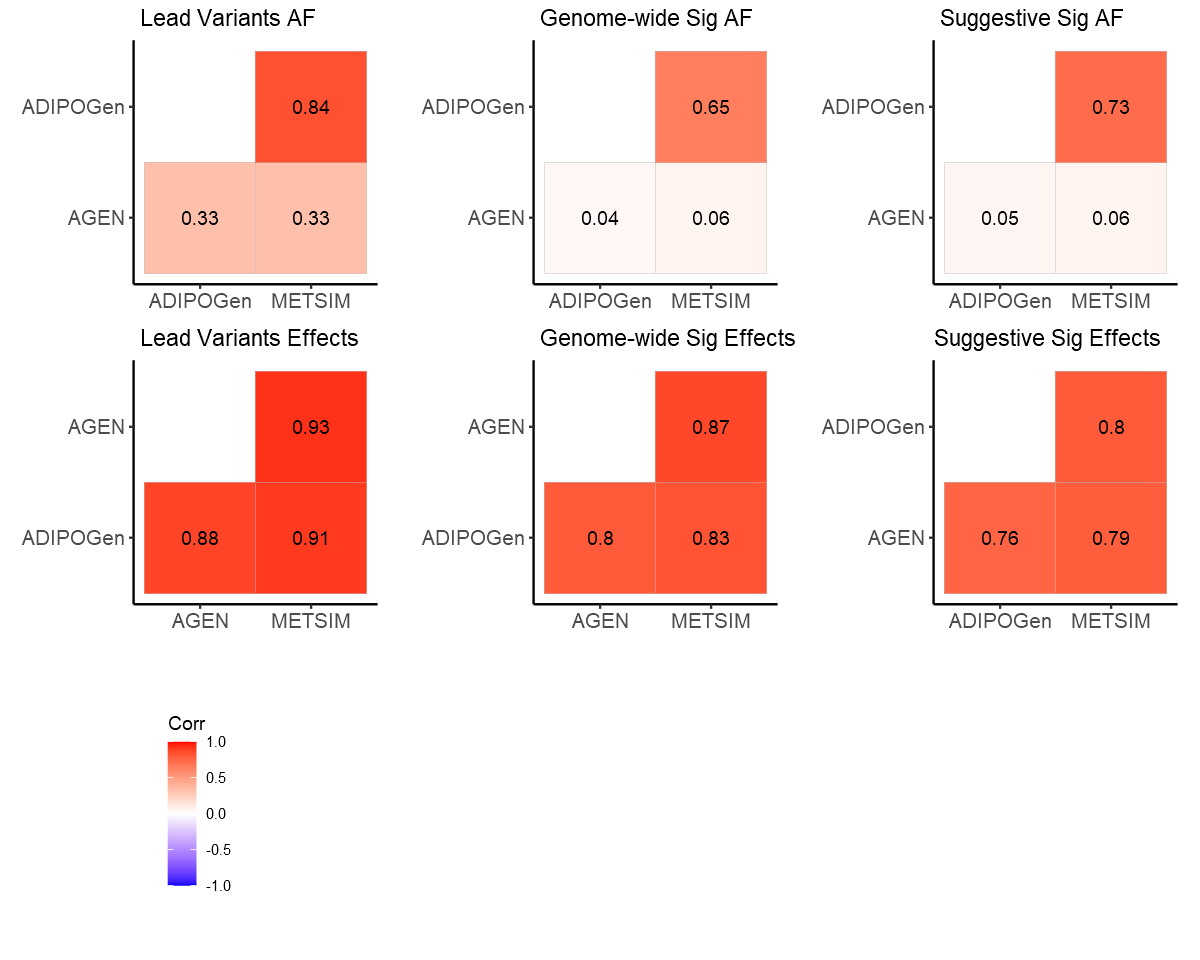

In [130]:
options(repr.plot.width=10, repr.plot.height=8)
p <- gridExtra::grid.arrange(p1,p2,p3,p4,p5,p7,legend,ncol=3)
p
ggsave(filename = "../../ANALYSIS/PAPER/Figures/Supplementary/SuppFig2.pdf", device = "pdf",  plot = p, width = 10, height =8 , dpi = 1200, units = "in")

In [ ]:
###phenomescan

In [4]:
df <- read.csv("../../ANALYSIS/PHEWAS/PHEWAS.csv",header=FALSE,row.names=NULL)%>%select(V1,V4,V8)%>%mutate(V4=gsub("group:","",V4))%>%mutate(V8=as.double(V8))

Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"


In [5]:
unique((df %>%filter(V8<1e-05))$V4)

[1] "LIPIDS"              "GLYCEMIC"            "ANTHROPOMETRIC"     
 [4] "HEMATOLOGICAL"       "CARDIOVASCULAR"      "RENAL"              
 [7] "METABOLITE"          "HEPATIC"             "ECG TRAITS"         
[10] "ATRIAL FIBRILLATION" "SLEEP AND CIRCADIAN" "PSYCHIATRIC"        
[13] "OTHER"

In [6]:
df3 <- arrange(df%>%separate(V1, into = c("chr", "pos","a1","a2"), sep = ":",remove=FALSE)%>%group_by(V1,V4)%>%filter(V8<1e-05)%>%mutate(chr=as.integer(chr))%>%mutate(count=n()),chr)

Warning message:
"Expected 4 pieces. Additional pieces discarded in 14 rows [583, 997, 1323, 3208, 3340, 3663, 4467, 5127, 5478, 5822, 6121, 6141, 6276, 6764]."


In [7]:

options(repr.plot.width=20, repr.plot.height=10)
p2 <- df3  %>%
  ggplot(aes(x=V1, y=V4, size=count, fill=count)) +
    geom_point(alpha=0.5, shape=21, color="black")+scale_size(range = c(2, 30), name="Number of associations")+
    theme(legend.position="bottom") +theme(axis.text = element_text(size=15))+
    ylab("") +
    xlab("")+ scale_y_discrete(labels=function(x) gsub("_", " ", x, fixed=TRUE))+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

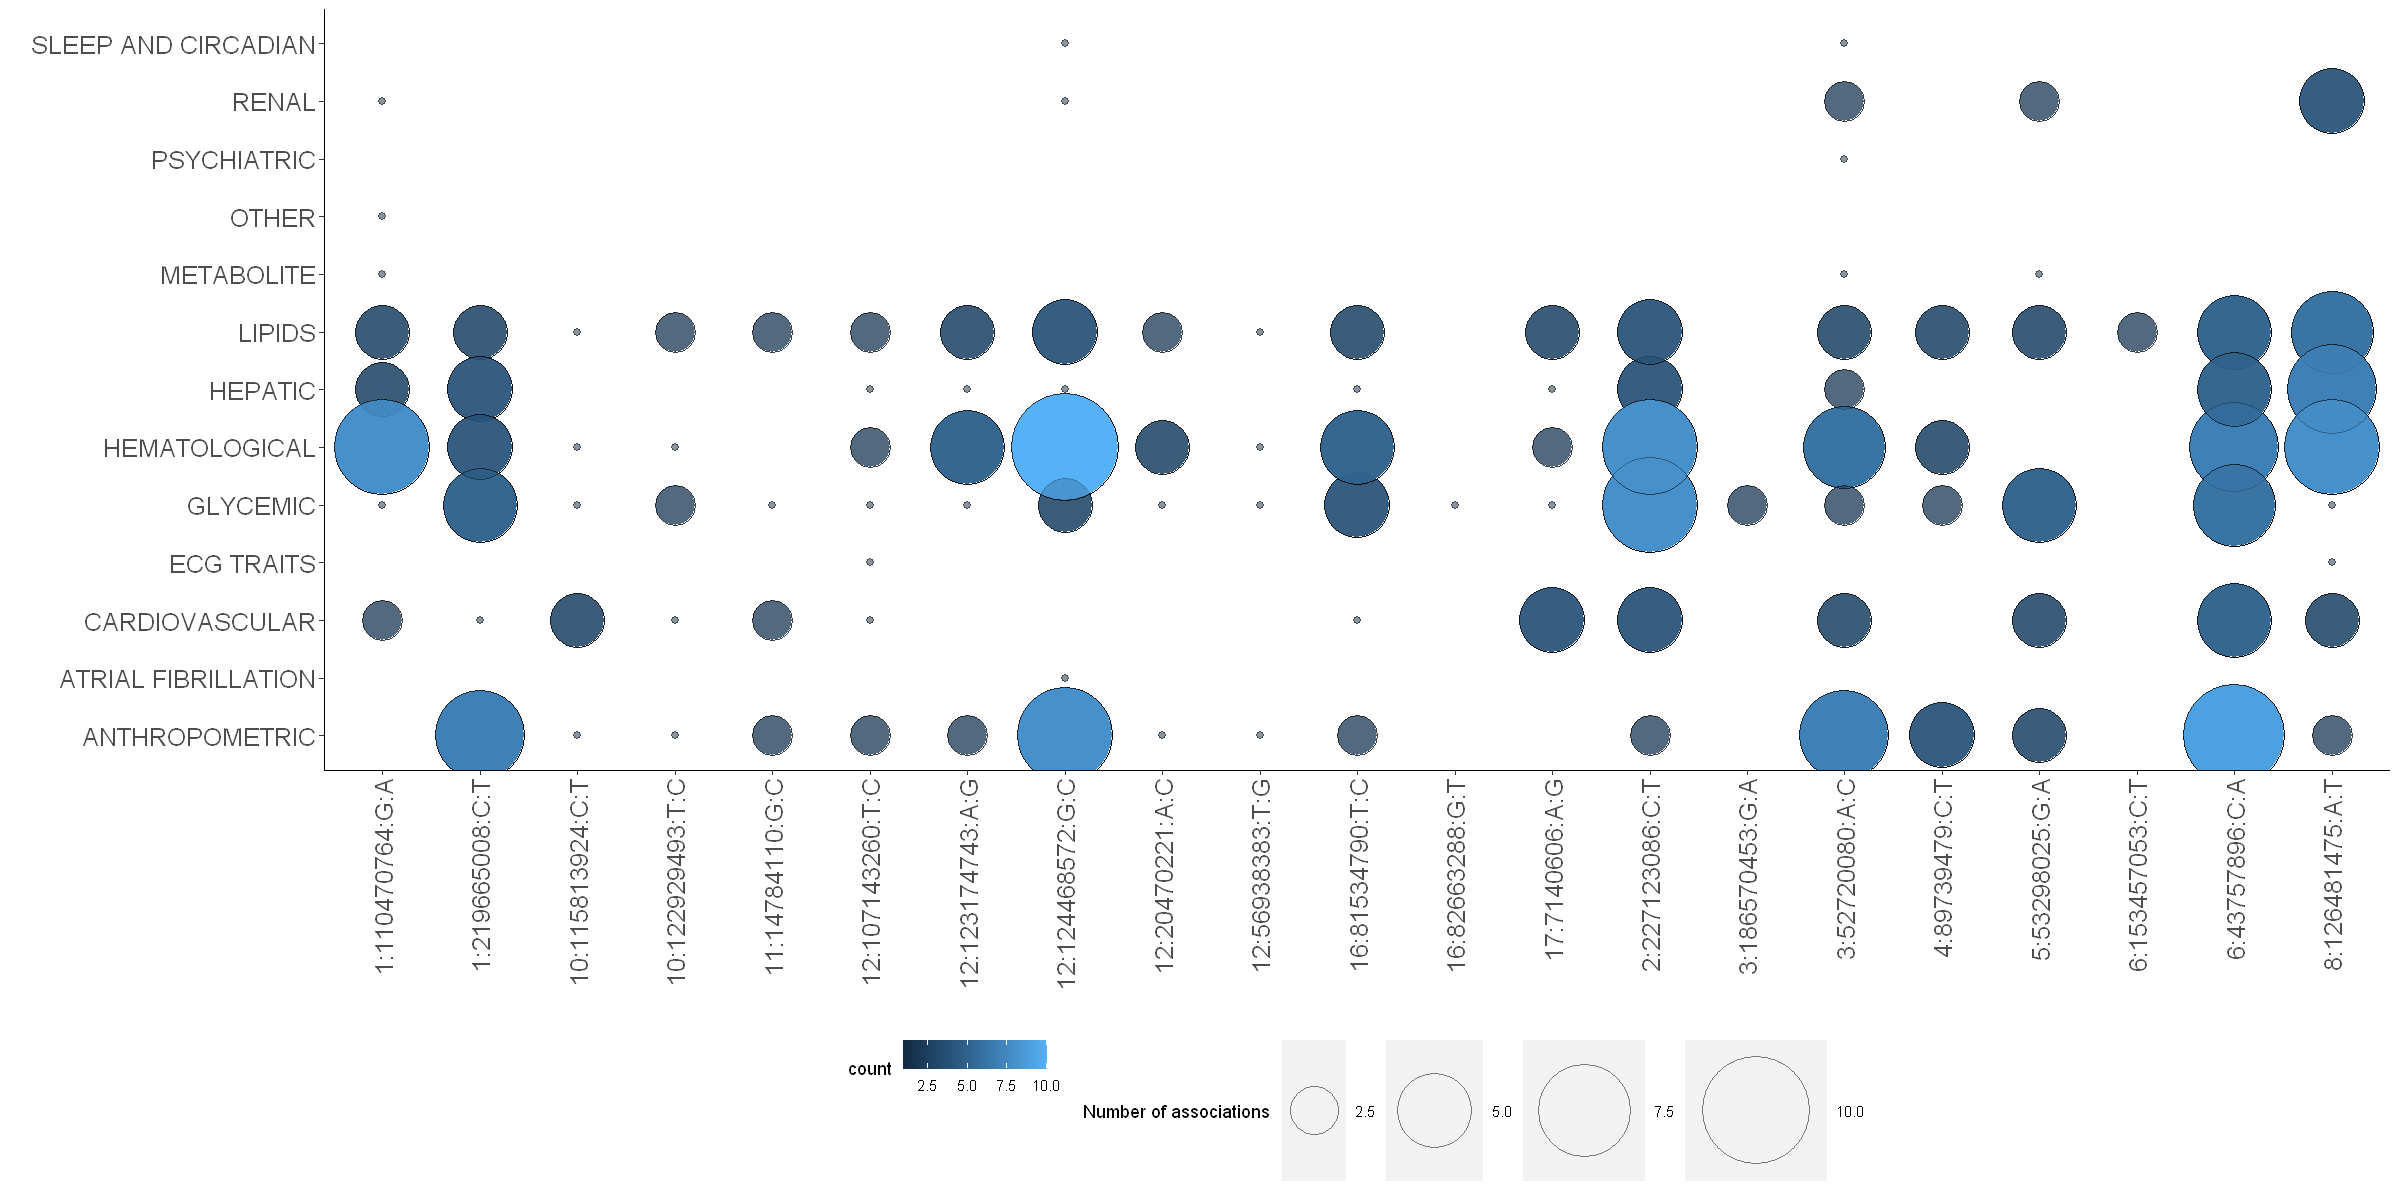

In [8]:
p2

In [95]:
ggsave(filename = "../../ANALYSIS/PAPER/Figures/Supplementary/SuppFig8.pdf", device = "pdf",  plot = p2, width = 20, height =10 , dpi = 600, units = "in")

In [32]:
lead_gene <- read.table("../../ANALYSIS/trans_lead_genes.txt",header=TRUE)

In [7]:
df <- read.table("../../ANALYSIS/translocus_PhenoScanner_GWAS.tsv.txt",header=TRUE,fill=TRUE,row.names=NULL)
lead_gene <- read.table("../../ANALYSIS/trans_lead_genes.txt",header=TRUE)
trait_ctrait <- read.table("../../ANALYSIS/trait_class.txt",header=TRUE,fill=TRUE)

In [8]:
df2 <- merge(df,lead_gene,by=c("snp","a1"))%>% mutate(SIGN=ifelse(sign(effect)==sign(beta),TRUE,FALSE))

In [9]:
 write.table(merge(df2,trait_ctrait),"../../ANALYSIS/PAPER/Tables//Supplementary/Phenomescanner.tab",quote=FALSE)

In [10]:
df3<- merge(df2,trait_ctrait)%>%group_by(snp,ctrait)%>%mutate(count=n())%>%select(ctrait,hg19_coordinates,gene,count)

Adding missing grouping variables: `snp`


In [15]:
df3%>%filter(ctrait=="Metabolic_traits")

snp,ctrait,hg19_coordinates,gene,count
<chr>,<chr>,<chr>,<chr>,<int>
rs11023332,Metabolic_traits,chr11:14784110,PDE3B,1
rs596359,Metabolic_traits,chr6:153457053,RGS17,1


In [39]:
library(hrbrthemes)
library(viridis)

Warning message:
"package 'hrbrthemes' was built under R version 4.2.1"
NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.2.1"


In [12]:
p2 <- df3  %>%
  ggplot(aes(x=gene, y=ctrait, size=count, fill=count)) +
    geom_point(alpha=0.5, shape=21, color="black")+scale_size(range = c(.1, 24), name="Number of associations")+
    theme(legend.position="bottom") +theme(axis.text = element_text(size=15))+
    ylab("") +
    xlab("")+ scale_y_discrete(labels=function(x) gsub("_", " ", x, fixed=TRUE))+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

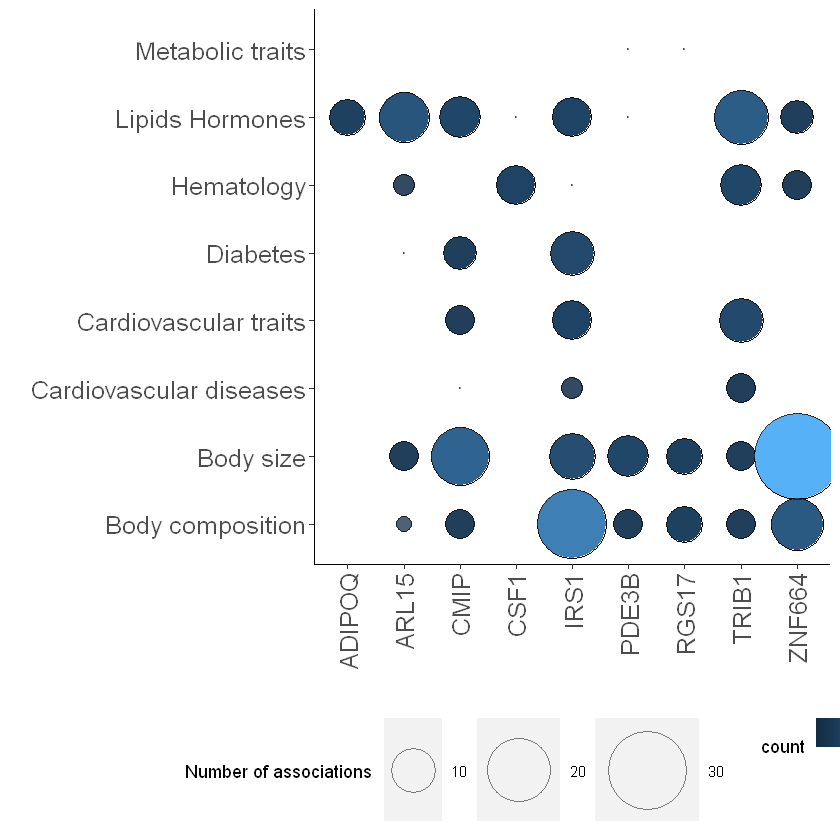

In [13]:
p2

In [250]:
ggsave(filename = "../../ANALYSIS/PAPER/Figures/Supplementary/SuppFig3.pdf", device = "pdf",  plot = p2, width = 10, height =8 , dpi = 1200, units = "in")

In [ ]:
df3